In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
training_set = pd.read_csv('../input/train.csv')
training_set.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [3]:
training_set.shape

(4357336, 26)

In [4]:
training_set.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
training_set.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,5.547651e-01,1.987925e+01,4.207759e+01,4.058035e+01,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,7.223452e-01,4.586552e+01,2.267769e+01,2.206667e+01,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,1.629000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.400000e+01,1.323000e+03,1.000000e+02,1.000000e+02,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


In [6]:
training_set.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

There is no missing data. 

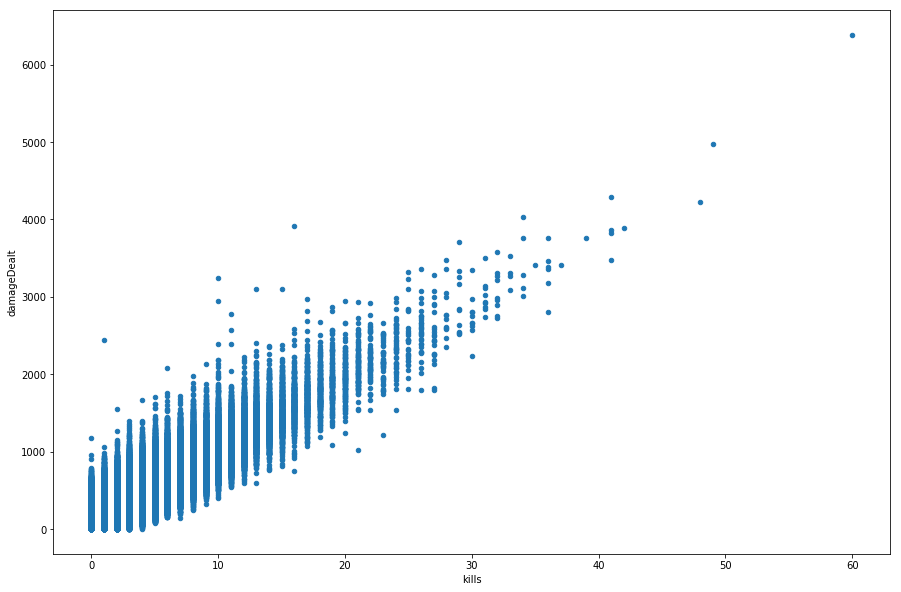

In [7]:
training_set.plot(x = "kills", y = "damageDealt", kind="scatter", figsize = (15,10))

Clearly, there is a positive correlation between the number of kills and damage dealt.

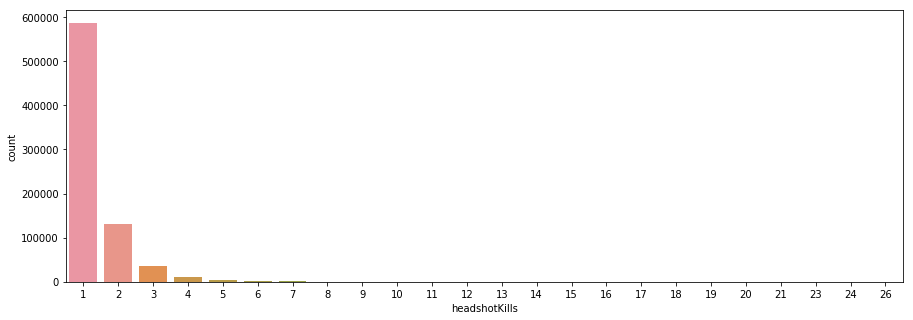

In [9]:
import seaborn as sns
headshots = training_set[training_set['headshotKills'] > 0]
plt.figure(figsize = (15, 5))
sns.countplot(headshots['headshotKills'])

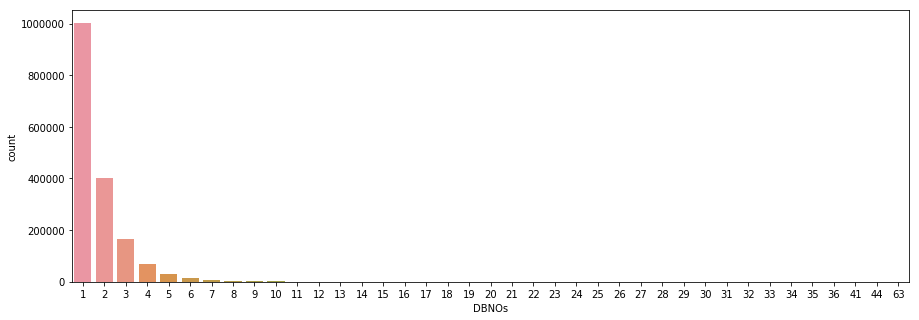

In [10]:
dbno = training_set[training_set['DBNOs'] > 0]
plt.figure(figsize = (15, 5))
sns.countplot(dbno['DBNOs'])

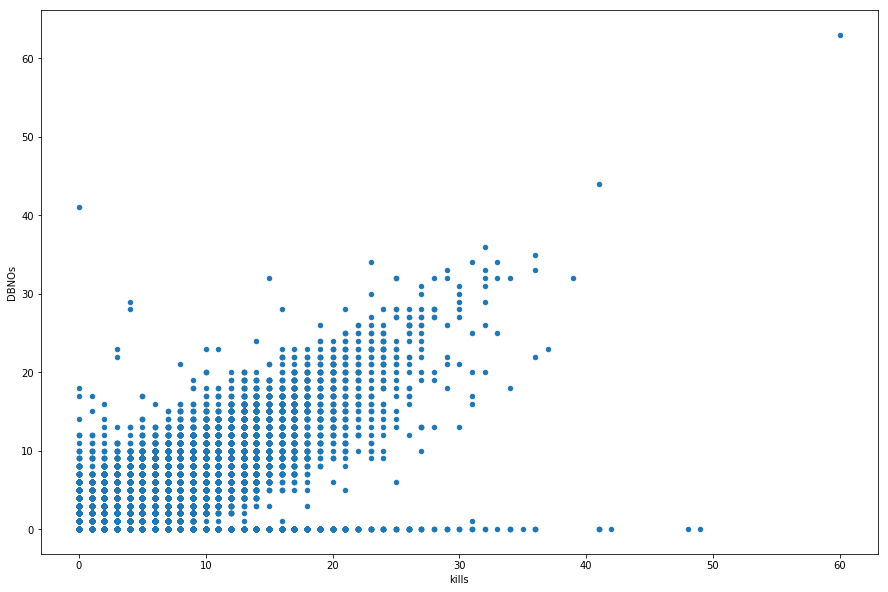

In [11]:
training_set.plot(x = 'kills', y = 'DBNOs', kind = 'scatter', figsize = (15, 10))

There is a positive correlation between no. of enemies down but not out (DBNO) and the number of kills.

In [12]:
walk0 = training_set["walkDistance"] == 0
ride0 = training_set["rideDistance"] == 0
swim0 = training_set["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

94306 of players didn't walk at all, 3439985 players didn't drive and 4076544 didn't swim.


Average place for non walkers is 0.039, minimum is 0.0, and best is 1.0, 95% players have a score below 0.2308.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61cbb406d8>]],
      dtype=object)

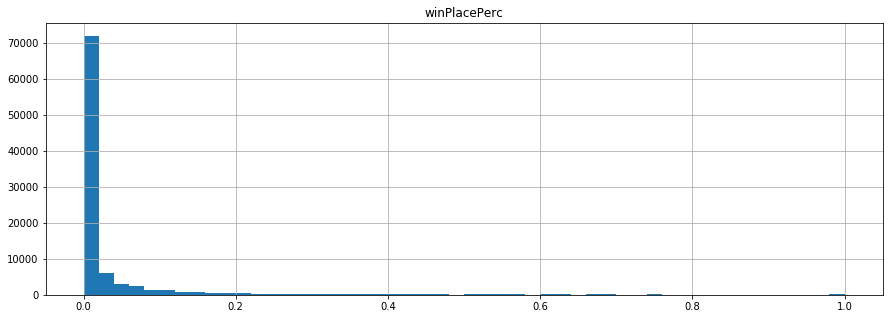

In [15]:
walk0_data = training_set[walk0]
print("Average place for non walkers is {:.3f}, minimum is {}, and best is {}, 95% players have a score below {}."
     .format(walk0_data['winPlacePerc'].mean(), walk0_data['winPlacePerc'].min(), walk0_data['winPlacePerc'].max(), walk0_data['winPlacePerc'].quantile(0.95)))
walk0_data.hist('winPlacePerc',bins = 50, figsize = (15, 5))

Most non walkers tend to be on the lower side of the scoreboard but some of them have the best scores. These could be suspicious players. Following are the players that did not walk at all but have the best score.

In [26]:
suspicious = training_set.query('walkDistance == 0 & winPlacePerc == 1')
suspicious.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1777,1777,344864,1777,6,0,1087.0,13,6,0,1,1000,12,2,1.539,4,4,5,0.0,0,0.0,0,0,0.0,9,1500,1.0
3405,3405,1057673,3405,3,1,1462.0,0,5,6,1,1000,15,1,83.780,7,7,0,0.0,0,0.0,0,0,0.0,29,1500,1.0
4609,4609,1588396,4609,0,0,365.7,4,1,0,9,1000,4,1,11.340,5,5,0,0.0,0,0.0,0,0,0.0,8,1500,1.0
16765,16765,299694,16765,3,0,771.7,6,0,4,11,1000,6,1,4.547,6,6,0,0.0,0,0.0,0,0,0.0,17,1500,1.0
19746,19746,429593,19746,4,1,1011.0,9,4,4,4,1000,9,2,191.400,3,3,1,0.0,0,0.0,0,0,0.0,16,1500,1.0


In [28]:
print("Maximum ride distance for suspected entries is {:.3f} meters, and swim distance is {:.1f} meters." .format(suspicious["rideDistance"].max(), suspicious["swimDistance"].max()))

Maximum ride distance for suspected entries is 0.000 meters, and swim distance is 28.7 meters.


Non walker- winners are non-rider winners as well becsause their ride distance is 0.

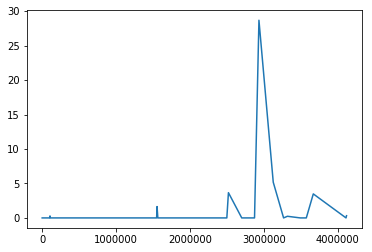

In [31]:
plt.plot(suspicious['swimDistance'])

In [35]:
suspicious_non_swimmer = suspicious[suspicious['swimDistance'] == 0]
suspicious_non_swimmer.shape

(162, 26)

So there are 162 non swimmers, non walkers and non riders who won. They clearly cheated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61c9ed67f0>]],
      dtype=object)

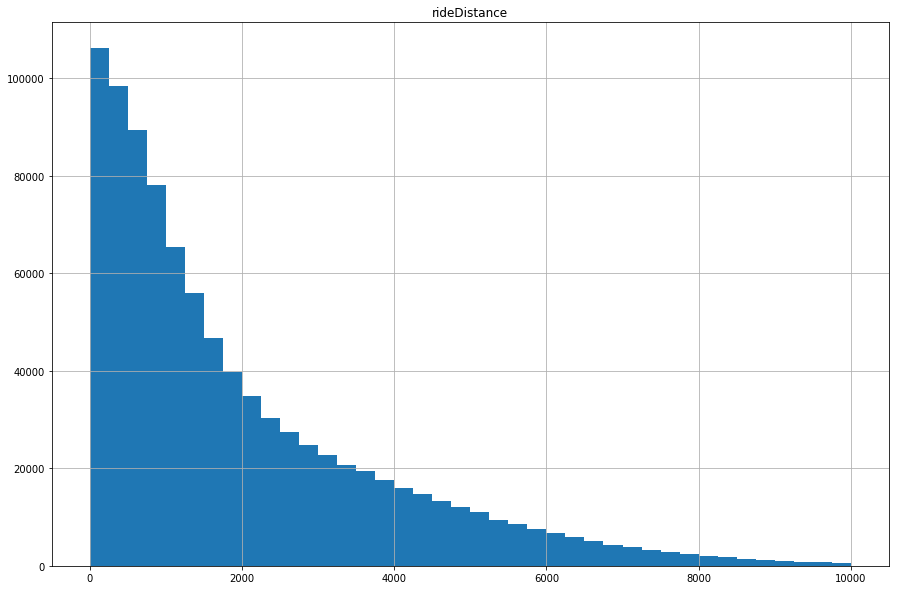

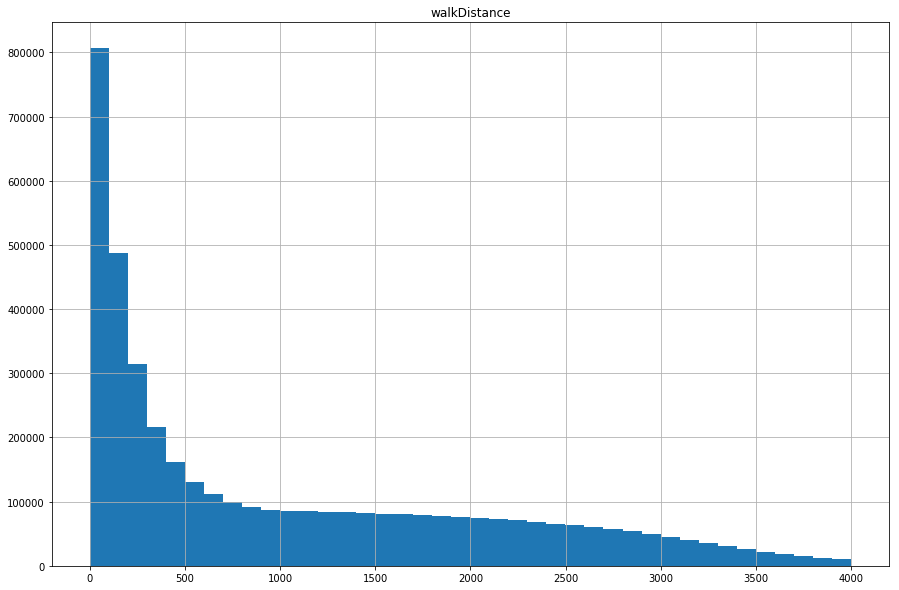

In [36]:
ride = training_set.query('rideDistance >0 & rideDistance <10000')
walk = training_set.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=40, figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10))

This shows that players mostly walk.